In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

# Import data from 2 downloaded csv files 

In [5]:
df_weekly_sales=pd.read_csv('/Users/i318891/Documents/PrivateGitHub/BarbaraBez/Data/AppWichStoreAttributes.csv')

df_weekly_weather=pd.read_csv('/Users/i318891/Documents/PrivateGitHub/BarbaraBez/Data/WEEKLY_WEATHER.csv')

## These csv files will be ignored for our initial evaluation

## df_store_attrib=pd.read_csv('AppWichStoreAttributes.csv')
## df_county_crime=pd.read_csv('county_crime.csv')
## df_county_demographics=pd.read_csv('county_demographic.csv')
## df_county_employment=pd.read_csv('county_employment.csv')

df_weekly_sales


,Store_Name,Store_Num,Store_City,Store_County,Store_State,Store_Weather_Station,Store_Location,Store_Drive_Through,Store_Near_School,Store_Competition_Fastfood,Store_Competition_Otherfood,Store_Traveller_Clients,Store_Minority_Clients,Annual_Rent_Estimate
0,Power City FreeStand,2,Power City,Power County,North State,Rail City Airport,Free Standing,Yes,Yes,10,25,No,NaN,63000
1,West Power StripMall,5,West Power City,Power County,North State,Rail City Airport,Strip Mall,No,No,1,9,No,NaN,48600
2,Power City StripMall,7,Power City,Power County,North State,Rail City Airport,Strip Mall,No,No,5,6,No,NaN,54000
3,Littletown StripMall,9,Littletown,Appleton County,North State,Appleton Airport,Strip Mall,No,No,7,18,Yes,"Hispanic, Native American",36000
4,River City StripMall,11,River City,River County,North State,River City Airport,Strip Mall,No,Yes,8,30,No,NaN,45000
5,Rail City BigBox,14,Rail City,Rail County,North State,Appleton Airport,Big Box,No,No,8,22,No,Hispanic,17500
6,Lake City StripMall,16,Lake City,Lake County,North State,Lake City Airport,Strip Mall,Yes,Yes,8,3,Yes,Hispanic,41400
7,North Town StripMall,19,North Town,Farm County,South State,North Town Airport,Strip Mall,No,Yes,2,20,Yes,Hispanic,37800
8,North Town BigBox,23,North Town,Farm County,South State,North Town Airport,Big Box,No,No,6,18,No,Hispanic,"20,700"
9,University Town BigBox,24,University Town,River County,North State,River City Airport,Big Box,No,No,2,1,No,NaN,15000


# Import data from API

(CSV file was uploaded using retool utilities)

In [6]:
url = "https://api-generator.retool.com/BGY2Fy/store_data"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

# response = requests.request("GET", url, headers=headers, data=payload)
json_data = json.loads(response.text)

df_api_stores = pd.read_json(url, orient='columns')
df_api_stores

,id,Store_Num,Store_City,Store_Name,Store_State,Store_County,Store_Location,Store_Near_School,Store_Drive_Through,Annual_Rent_Estimate,Store_Weather_Station,Store_Minority_Clients,Store_Traveller_Clients,Store_Competition_Fastfood,Store_Competition_Otherfood
0,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0
1,2,5.0,West Power City,West Power StripMall,North State,Power County,Strip Mall,No,No,48600,Rail City Airport,,No,1.0,9.0
2,3,7.0,Power City,Power City StripMall,North State,Power County,Strip Mall,No,No,54000,Rail City Airport,,No,5.0,6.0
3,4,9.0,Littletown,Littletown StripMall,North State,Appleton County,Strip Mall,No,No,36000,Appleton Airport,"Hispanic, Native American",Yes,7.0,18.0
4,5,11.0,River City,River City StripMall,North State,River County,Strip Mall,Yes,No,45000,River City Airport,,No,8.0,30.0
5,6,14.0,Rail City,Rail City BigBox,North State,Rail County,Big Box,No,No,17500,Appleton Airport,Hispanic,No,8.0,22.0
6,7,16.0,Lake City,Lake City StripMall,North State,Lake County,Strip Mall,Yes,Yes,41400,Lake City Airport,Hispanic,Yes,8.0,3.0
7,8,19.0,North Town,North Town StripMall,South State,Farm County,Strip Mall,Yes,No,37800,North Town Airport,Hispanic,Yes,2.0,20.0
8,9,23.0,North Town,North Town BigBox,South State,Farm County,Big Box,No,No,"20,700",North Town Airport,Hispanic,No,6.0,18.0
9,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0


##### Observation: Last record of df_api_stores to be dropped 

# Drop last record of df_api_stores

In [5]:
df_api_stores = df_api_stores.dropna()

df_api_stores

,id,Store_Num,Store_City,Store_Name,Store_State,Store_County,Store_Location,Store_Near_School,Store_Drive_Through,Annual_Rent_Estimate,Store_Weather_Station,Store_Minority_Clients,Store_Traveller_Clients,Store_Competition_Fastfood,Store_Competition_Otherfood
0,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0
1,2,5.0,West Power City,West Power StripMall,North State,Power County,Strip Mall,No,No,48600,Rail City Airport,,No,1.0,9.0
2,3,7.0,Power City,Power City StripMall,North State,Power County,Strip Mall,No,No,54000,Rail City Airport,,No,5.0,6.0
3,4,9.0,Littletown,Littletown StripMall,North State,Appleton County,Strip Mall,No,No,36000,Appleton Airport,"Hispanic, Native American",Yes,7.0,18.0
4,5,11.0,River City,River City StripMall,North State,River County,Strip Mall,Yes,No,45000,River City Airport,,No,8.0,30.0
5,6,14.0,Rail City,Rail City BigBox,North State,Rail County,Big Box,No,No,17500,Appleton Airport,Hispanic,No,8.0,22.0
6,7,16.0,Lake City,Lake City StripMall,North State,Lake County,Strip Mall,Yes,Yes,41400,Lake City Airport,Hispanic,Yes,8.0,3.0
7,8,19.0,North Town,North Town StripMall,South State,Farm County,Strip Mall,Yes,No,37800,North Town Airport,Hispanic,Yes,2.0,20.0
8,9,23.0,North Town,North Town BigBox,South State,Farm County,Big Box,No,No,"20,700",North Town Airport,Hispanic,No,6.0,18.0
9,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0


##### Extra row dropped

# Describe the data

In [6]:
df_weekly_sales.describe()

,INV_NUMBER,Store_num,Price,Sold,Del,Sales,Tot_Sls,Unit_Cost,Cost,Cost_Percent,Margin,Profit,Year,Month,Day
count,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000
mean,10324.927812,12.819064,4.497556,21.393712,0.023169,61.886939,0.006562,1.088306,19.501081,0.232938,0.006574,42.385858,2012.218654,6.642344,15.301589
std,11073.608940,7.240318,3.418160,52.765424,0.315561,137.407663,0.013400,1.207240,49.482371,0.219408,0.013535,94.471957,0.413336,3.396571,8.788084
min,1.000000,2.000000,-1.250000,-1.000000,-2.000000,-1283.000000,-0.108300,0.000000,-3.940000,0.000000,-0.192600,-1283.000000,2012.000000,1.000000,1.000000
25%,1621.000000,7.000000,1.750000,1.000000,0.000000,5.150000,0.000600,0.000000,0.000000,0.000000,0.000600,3.730000,2012.000000,4.000000,8.000000
50%,6705.000000,14.000000,4.750000,5.000000,0.000000,12.750000,0.001500,0.843800,2.400000,0.216304,0.001600,10.000000,2012.000000,7.000000,15.000000
75%,14261.000000,19.000000,6.250000,18.000000,0.000000,57.005000,0.006500,1.627200,12.760000,0.345708,0.007200,43.520000,2012.000000,9.000000,23.000000
max,40115.000000,24.000000,60.000000,934.000000,30.000000,4120.500000,0.388400,26.889700,2172.840000,2.677966,0.332700,1947.660000,2013.000000,12.000000,30.000000


In [7]:
df_api_stores.describe()

,id,Store_Num,Store_Competition_Fastfood,Store_Competition_Otherfood
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,13.000000,5.700000,15.200000
std,3.02765,7.512952,3.093003,9.852242
min,1.00000,2.000000,1.000000,1.000000
25%,3.25000,7.500000,2.750000,6.750000
50%,5.50000,12.500000,6.500000,18.000000
75%,7.75000,18.250000,8.000000,21.500000
max,10.00000,24.000000,10.000000,30.000000


In [8]:
df_weekly_weather.describe()

,Avg_Wind,Avg_Precip,Avg_Snow,Avg_Snow_Depth,Avg_Max_Temp,Avg_Min_Temp,Weather_Week,Weather_Days_Precipitated,Weather_Days_Snowed,Weather_Days_With_Snow_Accumulat,Weather_Days_With_Strong_Wind,Weather_Cold_Days,Weather_Bad_Weather_days
count,259.000000,259.000000,157.000000,157.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,6.265587,0.029283,0.014665,0.091902,65.187259,40.764387,27.247104,1.675676,0.057915,0.065637,0.011583,0.988417,2.343629
std,2.400416,0.041592,0.101095,0.615306,18.466201,11.367615,15.373664,1.657444,0.374224,0.535138,0.107206,1.977554,2.246804
min,1.118571,0.000000,0.000000,0.000000,28.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.427143,0.000000,0.000000,0.000000,50.714286,32.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.071429,0.011429,0.000000,0.000000,65.428571,39.285714,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.702857,0.042143,0.000000,0.000000,80.571429,49.285714,40.500000,3.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,15.945714,0.214286,0.985714,6.000000,99.142857,66.428571,53.000000,6.000000,4.000000,6.000000,1.000000,7.000000,7.000000


# Delete duplicate rows 

In [9]:
## Drop duplicates based on ['INV_NUMBER', 'Store_num', 'Description', 'Price', 'Sold', 'Del', 'Sales', 'Tot_Sls', 'Unit_Cost', 'Cost', 'Cost_Percent', 'Margin', 'Profit', 'Date', 'Year', 'Month', 'Day']
df_weekly_sales = df_weekly_sales.drop_duplicates(keep='first')


## Drop duplicates based on ['Store_Name', 'Store_Num', 'Store_City', 'Store_County', 'Store_State', 'Store_Weather_Station', 'Store_Location', 'Store_Drive_Through', 'Store_Near_School', 'Store_Competition_Fastfood', 'Store_Competition_Otherfood', 'Store_Traveller_Clients', 'Store_Minority_Clients', 'Annual_Rent_Estimate']
df_api_stores = df_api_stores.drop_duplicates(keep='first')


# Drop duplicates based on ['Weather_Station', 'Weather_Date', 'Avg_Wind', 'Avg_Precip', 'Avg_Snow', 'Avg_Snow_Depth', 'Avg_Max_Temp', 'Avg_Min_Temp', 'Weather_Week', 'Weather_Days_Precipitated', 'Weather_Days_Snowed', 'Weather_Days_With_Snow_Accumulat', 'Weather_Days_With_Strong_Wind', 'Weather_Cold_Days', 'Weather_Bad_Weather_days', 'Weather_Bad_Weather_Week']
df_weekly_weather = df_weekly_weather.drop_duplicates(keep='first')


In [10]:
df_weekly_sales.describe()

,INV_NUMBER,Store_num,Price,Sold,Del,Sales,Tot_Sls,Unit_Cost,Cost,Cost_Percent,Margin,Profit,Year,Month,Day
count,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000,79459.000000
mean,10324.927812,12.819064,4.497556,21.393712,0.023169,61.886939,0.006562,1.088306,19.501081,0.232938,0.006574,42.385858,2012.218654,6.642344,15.301589
std,11073.608940,7.240318,3.418160,52.765424,0.315561,137.407663,0.013400,1.207240,49.482371,0.219408,0.013535,94.471957,0.413336,3.396571,8.788084
min,1.000000,2.000000,-1.250000,-1.000000,-2.000000,-1283.000000,-0.108300,0.000000,-3.940000,0.000000,-0.192600,-1283.000000,2012.000000,1.000000,1.000000
25%,1621.000000,7.000000,1.750000,1.000000,0.000000,5.150000,0.000600,0.000000,0.000000,0.000000,0.000600,3.730000,2012.000000,4.000000,8.000000
50%,6705.000000,14.000000,4.750000,5.000000,0.000000,12.750000,0.001500,0.843800,2.400000,0.216304,0.001600,10.000000,2012.000000,7.000000,15.000000
75%,14261.000000,19.000000,6.250000,18.000000,0.000000,57.005000,0.006500,1.627200,12.760000,0.345708,0.007200,43.520000,2012.000000,9.000000,23.000000
max,40115.000000,24.000000,60.000000,934.000000,30.000000,4120.500000,0.388400,26.889700,2172.840000,2.677966,0.332700,1947.660000,2013.000000,12.000000,30.000000


In [11]:
df_api_stores.describe()

,id,Store_Num,Store_Competition_Fastfood,Store_Competition_Otherfood
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,13.000000,5.700000,15.200000
std,3.02765,7.512952,3.093003,9.852242
min,1.00000,2.000000,1.000000,1.000000
25%,3.25000,7.500000,2.750000,6.750000
50%,5.50000,12.500000,6.500000,18.000000
75%,7.75000,18.250000,8.000000,21.500000
max,10.00000,24.000000,10.000000,30.000000


In [12]:
df_weekly_weather.describe()

,Avg_Wind,Avg_Precip,Avg_Snow,Avg_Snow_Depth,Avg_Max_Temp,Avg_Min_Temp,Weather_Week,Weather_Days_Precipitated,Weather_Days_Snowed,Weather_Days_With_Snow_Accumulat,Weather_Days_With_Strong_Wind,Weather_Cold_Days,Weather_Bad_Weather_days
count,259.000000,259.000000,157.000000,157.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,6.265587,0.029283,0.014665,0.091902,65.187259,40.764387,27.247104,1.675676,0.057915,0.065637,0.011583,0.988417,2.343629
std,2.400416,0.041592,0.101095,0.615306,18.466201,11.367615,15.373664,1.657444,0.374224,0.535138,0.107206,1.977554,2.246804
min,1.118571,0.000000,0.000000,0.000000,28.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.427143,0.000000,0.000000,0.000000,50.714286,32.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.071429,0.011429,0.000000,0.000000,65.428571,39.285714,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.702857,0.042143,0.000000,0.000000,80.571429,49.285714,40.500000,3.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,15.945714,0.214286,0.985714,6.000000,99.142857,66.428571,53.000000,6.000000,4.000000,6.000000,1.000000,7.000000,7.000000


##### No duplicates were found as the row counts the same as before the deletes.

# Create visualization to understand weekly sales per store

<BarContainer object of 79459 artists>

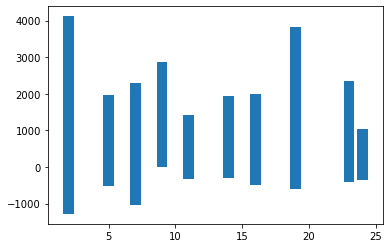

In [13]:
plt.bar(df_weekly_sales['Store_num'], df_weekly_sales['Sales'])

# Investigate the negative values

In [14]:

# Step: Keep rows where Sales < 0
df_negative_weekly_sales = df_weekly_sales.loc[df_weekly_sales['Sales'] < 0]

# Step: Sort column(s) Description ascending (A-Z)
df_negative_weekly_sales = df_weekly_sales.sort_values(by=['Description'], ascending=[True])

df_negative_weekly_sales

,INV_NUMBER,Store_num,Description,Price,Sold,Del,Sales,Tot_Sls,Unit_Cost,Cost,Cost_Percent,Margin,Profit,Date,Year,Month,Day
25237,9515,7,$1 OFF PREMIUM SUB,-1.0,-1,0,16.50,0.0014,0.0,0.0,0.0,0.0020,16.50,03/17/13,2013,3,17
49437,4011,16,$1.00 OFF REGULAR & 21OZ,-1.0,1,0,-1.00,-0.0001,0.0,0.0,0.0,-0.0001,-1.00,06/03/12,2012,6,3
39290,4009,11,$1.00 OFF REGULAR SUB,-1.0,2,0,-2.00,-0.0003,0.0,0.0,0.0,-0.0004,-2.00,03/03/13,2013,3,3
47218,4009,14,$1.00 OFF REGULAR SUB,-1.0,1,0,-1.00,-0.0001,0.0,0.0,0.0,-0.0002,-1.00,02/17/13,2013,2,17
55992,4009,19,$1.00 OFF REGULAR SUB,-1.0,43,0,-43.00,-0.0033,0.0,0.0,0.0,-0.0047,-43.00,04/15/12,2012,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314,35028,5,YOGURT PARFAIT,1.5,5,0,7.50,0.0012,0.0,0.0,0.0,0.0018,7.50,11/04/12,2012,11,4
57738,35028,19,YOGURT PARFAIT,1.5,9,0,13.50,0.0012,0.0,0.0,0.0,0.0017,13.50,07/01/12,2012,7,1
31521,35028,9,YOGURT PARFAIT,1.5,17,0,25.50,0.0023,0.0,0.0,0.0,0.0035,25.50,02/03/13,2013,2,3
46474,35028,14,YOGURT PARFAIT,1.5,10,0,14.85,0.0024,0.0,0.0,0.0,0.0033,14.85,01/13/13,2013,1,13


##### Observation: Negative sales are REWARDS or "free food" or refunds or discounts which are deducted from sales/profit.

# Create visualization to understand weekly profit per store

<BarContainer object of 79459 artists>

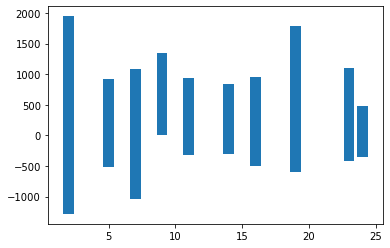

In [15]:
plt.bar(df_weekly_sales['Store_num'], df_weekly_sales['Profit'])

##### Observation: Correlation between Sales and Profits

# Identify weekly profit per store per week

In [16]:
df_weekly_profit_per_store = df_weekly_sales.groupby(['Date', 'Store_num']).agg(Profit_sum=('Profit', 'sum')).reset_index()

df_weekly_profit_per_store


,Date,Store_num,Profit_sum
0,01/06/13,2,11358.48
1,01/06/13,5,4892.15
2,01/06/13,7,7449.71
3,01/06/13,9,6488.06
4,01/06/13,11,4021.14
...,...,...,...
515,12/30/12,14,4438.33
516,12/30/12,16,5823.94
517,12/30/12,19,6335.21
518,12/30/12,23,5249.03


# Drop any duplicate data in df_weekly_profit_per_store

In [17]:
# Step: Drop duplicates based on ['Date', 'Store_num', 'Profit_sum']
df_weekly_profit_per_store = df_weekly_profit_per_store.drop_duplicates(keep='first')

df_weekly_profit_per_store

,Date,Store_num,Profit_sum
0,01/06/13,2,11358.48
1,01/06/13,5,4892.15
2,01/06/13,7,7449.71
3,01/06/13,9,6488.06
4,01/06/13,11,4021.14
...,...,...,...
515,12/30/12,14,4438.33
516,12/30/12,16,5823.94
517,12/30/12,19,6335.21
518,12/30/12,23,5249.03


#####  No duplicates were found.

# Find mean Profit value for all Stores

In [18]:
#df_weekly_profit_per_store

df_profit_mean = df_weekly_profit_per_store[["Profit_sum"]].mean()
df_profit_mean

Profit_sum    6476.803673
dtype: float64

# Weeks where profit (per store) was below the mean


This is a valuable insight and will also be useful when analysing which factors affect profit.

In [20]:
df_stores_below_mean_profit=df_weekly_profit_per_store[df_weekly_profit_per_store.Profit_sum < 6489.283064]
df_stores_below_mean_profit


,Date,Store_num,Profit_sum
1,01/06/13,5,4892.15
3,01/06/13,9,6488.06
4,01/06/13,11,4021.14
5,01/06/13,14,4194.66
8,01/06/13,23,5156.44
...,...,...,...
515,12/30/12,14,4438.33
516,12/30/12,16,5823.94
517,12/30/12,19,6335.21
518,12/30/12,23,5249.03


# Join weekly profit (per store) to store data to gather more insights

Outer Join with df_weekly_profit_per_store where Store_Num=Store_num -> df_WPPS_NAWS (Weekly Profit Per Store and Name and Weather Station data) to then later join to weather data.

In [21]:
df_WPPS_NAWS = pd.merge(df_api_stores, df_weekly_profit_per_store, how='outer', left_on=['Store_Num'], right_on=['Store_num'])

df_WPPS_NAWS

,id,Store_Num,Store_City,Store_Name,Store_State,Store_County,Store_Location,Store_Near_School,Store_Drive_Through,Annual_Rent_Estimate,Store_Weather_Station,Store_Minority_Clients,Store_Traveller_Clients,Store_Competition_Fastfood,Store_Competition_Otherfood,Date,Store_num,Profit_sum
0,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/06/13,2,11358.48
1,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/13/13,2,10680.67
2,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/20/13,2,10049.23
3,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/27/13,2,11219.99
4,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,02/03/13,2,11583.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/02/12,24,4844.99
516,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/09/12,24,5103.14
517,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/16/12,24,5029.64
518,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/23/12,24,3930.03


# Sort on Highest Weekly Profit

In [22]:

df_WPPS_NAWS_sorted = df_WPPS_NAWS.sort_values(by=['Profit_sum','Store_Num'], ascending=[True, True])

df_WPPS_NAWS_sorted

,id,Store_Num,Store_City,Store_Name,Store_State,Store_County,Store_Location,Store_Near_School,Store_Drive_Through,Annual_Rent_Estimate,Store_Weather_Station,Store_Minority_Clients,Store_Traveller_Clients,Store_Competition_Fastfood,Store_Competition_Otherfood,Date,Store_num,Profit_sum
253,5,11.0,River City,River City StripMall,North State,River County,Strip Mall,Yes,No,45000,River City Airport,,No,8.0,30.0,11/18/12,11,2616.52
97,2,5.0,West Power City,West Power StripMall,North State,Power County,Strip Mall,No,No,48600,Rail City Airport,,No,1.0,9.0,11/18/12,5,2996.68
503,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,09/09/12,24,3213.89
258,5,11.0,River City,River City StripMall,North State,River County,Strip Mall,Yes,No,45000,River City Airport,,No,8.0,30.0,12/23/12,11,3298.73
502,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,09/02/12,24,3346.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,04/15/12,2,13810.84
15,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,04/22/12,2,13841.00
16,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,04/29/12,2,14628.11
17,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,05/06/12,2,14713.85


#### Noted: no duplicates in df_WPPS_NAWS but there are missing values in the Store_Minority_Client.

# Replace missing values in df_WPPS_NAWS

In [24]:
df_WPPS_NAWS[['Store_Minority_Clients']] = df_WPPS_NAWS[['Store_Minority_Clients']].fillna('Unknown')

df_WPPS_NAWS

,id,Store_Num,Store_City,Store_Name,Store_State,Store_County,Store_Location,Store_Near_School,Store_Drive_Through,Annual_Rent_Estimate,Store_Weather_Station,Store_Minority_Clients,Store_Traveller_Clients,Store_Competition_Fastfood,Store_Competition_Otherfood,Date,Store_num,Profit_sum
0,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/06/13,2,11358.48
1,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/13/13,2,10680.67
2,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/20/13,2,10049.23
3,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,01/27/13,2,11219.99
4,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,Rail City Airport,,No,10.0,25.0,02/03/13,2,11583.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/02/12,24,4844.99
516,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/09/12,24,5103.14
517,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/16/12,24,5029.64
518,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,River City Airport,,No,2.0,1.0,12/23/12,24,3930.03


##### The missing values in Store_Minority column have been replaced with 'unknown'.

# Format Weather Dates to prepare for Join

In [ ]:
df_weekly_weather["Weather_Date"] = pd.to_datetime(df_weekly_weather["Weather_Date"]).dt.strftime('%d-%m-%Y')
df_weekly_weather

In [ ]:
df_WPPS_NAWS["Date"] = pd.to_datetime(df_WPPS_NAWS["Date"]).dt.strftime('%d-%m-%Y')
df_WPPS_NAWS


## Join the Sales data and Weather data

In [28]:
# Step: Left Join with df_weekly_weather where Date=Weather_Date, Store_Weather_Station=Weather_Station
df_WPPS_NAWS_weather = pd.merge(df_WPPS_NAWS, df_weekly_weather, how='left', left_on=['Date', 'Store_Weather_Station'], right_on=['Weather_Date', 'Weather_Station'])

df_WPPS_NAWS_weather

,id,Store_Num,Store_City,Store_Name,Store_State,Store_County,Store_Location,Store_Near_School,Store_Drive_Through,Annual_Rent_Estimate,...,Avg_Max_Temp,Avg_Min_Temp,Weather_Week,Weather_Days_Precipitated,Weather_Days_Snowed,Weather_Days_With_Snow_Accumulat,Weather_Days_With_Strong_Wind,Weather_Cold_Days,Weather_Bad_Weather_days,Weather_Bad_Weather_Week
0,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,...,43.428571,27.285714,1.0,2.0,0.0,0.0,0.0,4.0,6.0,Yes
1,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,...,32.428571,22.714286,2.0,0.0,0.0,0.0,0.0,7.0,7.0,Yes
2,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,...,32.000000,26.428571,3.0,3.0,0.0,0.0,0.0,7.0,7.0,Yes
3,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,...,50.142857,32.142857,4.0,0.0,0.0,0.0,0.0,2.0,2.0,No
4,1,2.0,Power City,Power City FreeStand,North State,Power County,Free Standing,Yes,Yes,63000,...,48.857143,28.000000,5.0,0.0,0.0,0.0,0.0,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,...,52.714286,39.714286,49.0,4.0,0.0,0.0,0.0,1.0,5.0,Yes
516,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,...,44.000000,32.000000,50.0,3.0,0.0,0.0,0.0,3.0,4.0,No
517,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,...,50.142857,34.428571,51.0,3.0,0.0,0.0,1.0,1.0,5.0,Yes
518,10,24.0,University Town,University Town BigBox,North State,River County,Big Box,No,No,15000,...,39.857143,31.000000,52.0,4.0,1.0,0.0,0.0,6.0,7.0,Yes


# FINALLY: Does bad weather affect profits?

Collect weekly profits for good and bad weather.

In [29]:
# Step: Select columns
df_WPPS_NAWS_weather_compare_profit = df_WPPS_NAWS_weather[['Profit_sum', 'Weather_Bad_Weather_Week']]

df_WPPS_NAWS_weather_compare_profit

,Profit_sum,Weather_Bad_Weather_Week
0,11358.48,Yes
1,10680.67,Yes
2,10049.23,Yes
3,11219.99,No
4,11583.85,No
...,...,...
515,4844.99,Yes
516,5103.14,No
517,5029.64,Yes
518,3930.03,Yes


## View total profits by Good and Bad Weather

In [30]:

df_WPPS_NAWS_weather_compare_profit_sum = df_WPPS_NAWS_weather_compare_profit.groupby(['Weather_Bad_Weather_Week']).agg(Profit_sum=('Profit_sum', 'sum')).reset_index()

df_WPPS_NAWS_weather_compare_profit_sum 




,Weather_Bad_Weather_Week,Profit_sum
0,No,2790592.22
1,Yes,549023.82


## It seems quite conclusive, profits are higher when the weather is good :)

In [34]:
df_WPPS_NAWS_weather_compare_profit_sum

,Weather_Bad_Weather_Week,Profit_sum
0,No,2790592.22
1,Yes,549023.82


[Text(0.5, 1.0, 'How weather affects Profit')]

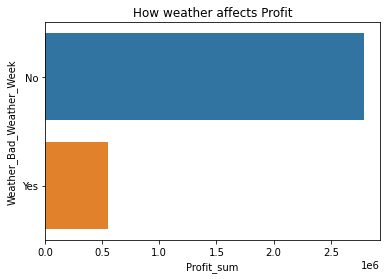

In [43]:
#plt.bar(df_WPPS_NAWS_weather_compare_profit_sum['Profit_sum'], df_WPPS_NAWS_weather_compare_profit_sum['Weather_Bad_Weather_Week'])

#final_fig = plt.figure(figsize = (10, 5))
 
#plt.bar(df_WPPS_NAWS_weather_compare_profit_sum['Profit_sum'], df_WPPS_NAWS_weather_compare_profit_sum['Weather_Bad_Weather_Week'])

sns.barplot(x= df_WPPS_NAWS_weather_compare_profit_sum['Profit_sum'], y= df_WPPS_NAWS_weather_compare_profit_sum['Weather_Bad_Weather_Week']).set(title='How weather affects Profit')
 
#plt.xlabel("Profits")
#plt.ylabel("Is it Bad Weather?")
#plt.title("How Weather Affects Profits")
#plt.show()

# read a titanic.csv file
# from seaborn library


#### Conclusion: Good weather generates profits!